In [10]:
!git config user.email "naazshafeer@gmail.com"
!git config user.name "Naaz Shafeer"

In [12]:
pip install numpy scipy matplotlib ffmpeg


Note: you may need to restart the kernel to use updated packages.


In [13]:
%matplotlib notebook

Test for AGN.FITS file

In [113]:
import matplotlib
import matplotlib.text

matplotlib.text.Text(text=  'x', fontproperties= 'Times New Roman')  # lol, still in process in figuriing out on how to change the font

Text(0, 0, 'x')

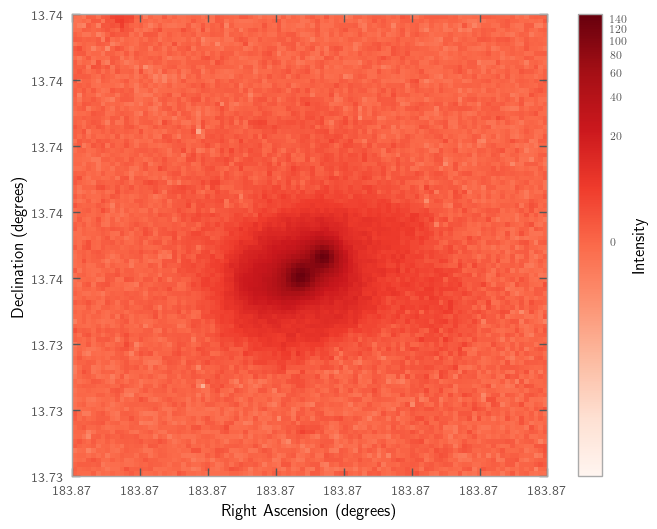

In [3]:
import matplotlib.pyplot as plt
import matplotlib.pyplot
from matplotlib import rc
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS

from astropy.visualization import astropy_mpl_style
from astropy.visualization.mpl_normalize import simple_norm

plt.style.use(astropy_mpl_style)



fits_image_filename = 'FITS FILES/agn.fits'


with fits.open(fits_image_filename) as hdul:
    image_data = hdul[0].data
    wcs = WCS(hdul[0].header)


ysize, xsize = image_data.shape

xcorner, ycorner = wcs.pixel_to_world_values([0, xsize], [0, ysize])


fig, ax = plt.subplots()


extent = [xcorner[0], xcorner[1], ycorner[0], ycorner[1]]
norm = simple_norm(image_data, stretch='log', power = 2.0, asinh_a= 0.22, min_cut = -5, max_cut=150)
im = ax.imshow(image_data, cmap='Reds', norm=norm, origin='upper', aspect='equal', extent=extent)


x_ticks = np.linspace(xcorner[0], xcorner[1], 8)
y_ticks = np.linspace(ycorner[0], ycorner[1], 8)

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

ax.set_xticklabels([f'{val:.2f}' for val in x_ticks], fontsize=10)  
ax.set_yticklabels([f'{val:.2f}' for val in y_ticks], fontsize=10)  
ax.tick_params(axis='both', direction='in', length=6, width=1, which='both', top=True, right=True)


ax.set_xlabel('Right Ascension (degrees)', fontsize=12, )  # Specify font size for x-axis label
ax.set_ylabel('Declination (degrees)', fontsize=12)  # Specify font size for y-axis label
ax.grid(False)



cbar = plt.colorbar(im, ax = ax, label='Intensity')
cbar.ax.tick_params(labelsize=8)  # Specify smaller font size for colorbar ticks
cbar.set_label('Intensity', fontsize=12)  # Specify font size for colorbar label


plt.show()



This is the trials for fixing the scale issues and mostly the axes (RA and ticksmarks) issues

In [18]:
from astropy.io import fits


fits_image_filename = 'agn.fits'
f = fits.open(fits_image_filename)


print(f[0].header)


wcs = WCS(f[0].header)

print("Ref Pixel", wcs.wcs.crpix)
print("Coord Value at Ref PIxel", wcs.wcs.crval)
print("Pixel Scale", wcs.wcs.cdelt)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    2 / Number of axes                                 NAXIS1  =                  100 / Axis length                                    NAXIS2  =                  100 / Axis length                                    EXTEND  =                    T / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        DATE    = '2020-10-23T22:16:16' / Date FITS file was generated                  IRAF-TLM= '2020-10-23T22:16:13' / Time of last modification                     OBJECT  = 'J1215+1344'         / Name of the object observed                    EQUINOX =        2000.00000000 / Mean equinox                                   MJD-OBS =   5.890100000000E+04 / [d] MJD of observation                         RADESYS = 'ICRS    '           / Equator

/var/folders/rf/799sdl_537nf32dnhw741jq80000gn/T/ipykernel_30839/2799984724.py:15: RuntimeWarning: cdelt will be ignored since cd is present
  print("Pixel Scale", wcs.wcs.cdelt)


In [19]:
from astropy.io import fits
fits_image_filename = fits.open('agn.fits')

print(fits_image_filename)


Testing with different fits files :)

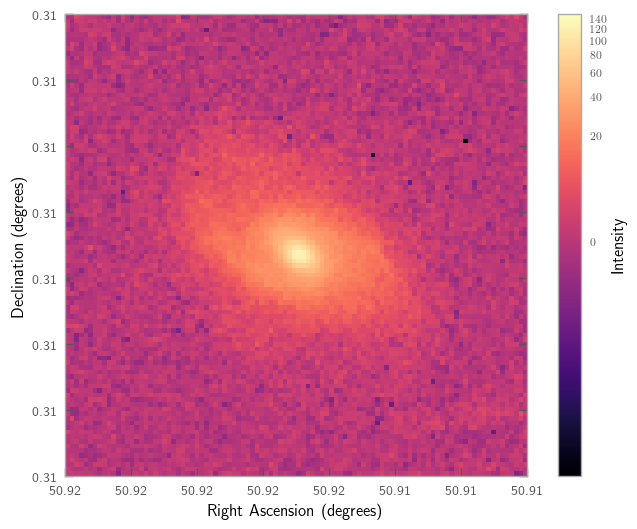

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import astropy_mpl_style
from astropy.visualization.mpl_normalize import simple_norm

plt.style.use(astropy_mpl_style)


fits_image_filename = 'FITS FILES/J0323+0018.fits'


with fits.open(fits_image_filename) as hdul:
    image_data = hdul[0].data
    wcs = WCS(hdul[0].header)


ysize, xsize = image_data.shape

xcorner, ycorner = wcs.pixel_to_world_values([0, xsize], [0, ysize])


fig, ax = plt.subplots()


extent = [xcorner[0], xcorner[1], ycorner[0], ycorner[1]]
norm = simple_norm(image_data, stretch='log', power = 2.0, asinh_a= 0.22, min_cut= -5, max_cut=150)
im = ax.imshow(image_data, cmap='magma', norm=norm, origin='upper', aspect='equal', extent=extent)


x_ticks = np.linspace(xcorner[0], xcorner[1], 8)
y_ticks = np.linspace(ycorner[0], ycorner[1], 8)

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

ax.set_xticklabels([f'{val:.2f}' for val in x_ticks], fontsize=10)  
ax.set_yticklabels([f'{val:.2f}' for val in y_ticks], fontsize=10)  
ax.tick_params(axis='both', direction='in', length=6, width=1, which='both', top=True, right=True)


ax.set_xlabel('Right Ascension (degrees)', fontsize=12)  # Specify font size for x-axis label
ax.set_ylabel('Declination (degrees)', fontsize=12)  # Specify font size for y-axis label
ax.grid(False)



cbar = plt.colorbar(im, ax=ax, label='Intensity')
cbar.ax.tick_params(labelsize=8)  # Specify smaller font size for colorbar ticks
cbar.set_label('Intensity', fontsize=12)  # Specify font size for colorbar label


plt.show()
#messed around with colorbar to control whcih quantiites will be assigned with max and min


Making of Class and Function

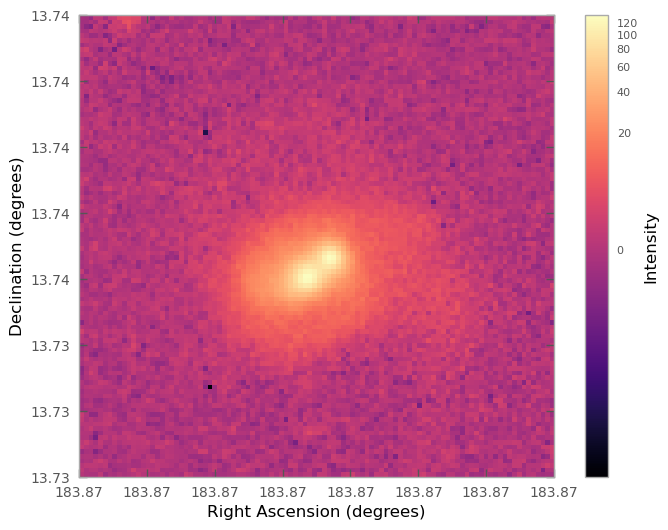

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import astropy_mpl_style
from astropy.visualization.mpl_normalize import simple_norm

#use data classes to assign properties, default properties and change through specific things that oyu put in
#my main idea is to make a a class that will take a file that will be the input that the use puts in 
#and then this class/function will go through the code I made above and spit out a graph that has good details
#along with the name of the fits file, with important information found in the fits file

class FITS_analyzer:
    def __init__(self, file):
        self.file = file
    def analyze(self):
        with fits.open(self.file) as hdul:
            image_data = hdul[0].data
            wcs = WCS(hdul[0].header)


        ysize, xsize = image_data.shape

        xcorner, ycorner = wcs.pixel_to_world_values([0, xsize], [0, ysize])


        fig, ax = plt.subplots()


        extent = [xcorner[0], xcorner[1], ycorner[0], ycorner[1]]
        norm = simple_norm(image_data, stretch='log', power=2.0, asinh_a=0.5)
        im = ax.imshow(image_data, cmap='magma', norm=norm, origin='upper', aspect='equal', extent=extent)


        x_ticks = np.linspace(xcorner[0], xcorner[1], 8)
        y_ticks = np.linspace(ycorner[0], ycorner[1], 8)

        ax.set_xticks(x_ticks)
        ax.set_yticks(y_ticks)

        ax.set_xticklabels([f'{val:.2f}' for val in x_ticks], fontsize=10)  
        ax.set_yticklabels([f'{val:.2f}' for val in y_ticks], fontsize=10)  
        ax.tick_params(axis='both', direction='in', length=6, width=1, which='both', top=True, right=True)


        ax.set_xlabel('Right Ascension (degrees)', fontsize=12)  # Specify font size for x-axis label
        ax.set_ylabel('Declination (degrees)', fontsize=12)  # Specify font size for y-axis label
        ax.grid(False)



        cbar = plt.colorbar(im, ax=ax, label='Intensity')
        cbar.ax.tick_params(labelsize=8)  # Specify smaller font size for colorbar ticks
        cbar.set_label('Intensity', fontsize=12)  # Specify font size for colorbar label


file_path = 'FITS FILES/agn.fits' #had to use relative path, need to update class so that any input(from downloads) will be able to output
analyzer = FITS_analyzer(file_path)
analyzer.analyze()
    
    
            




Modelling 2-Body Problem 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import scipy as sci
from scipy import integrate
from scipy.integrate import odeint

This example is for Alpha Centauri stars : now changed to black hole

In [2]:
#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2
#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri
#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

#Define masses
m1=0.5 #Alpha Centauri A
m2=0.2 #Alpha Centauri B
#Define initial position vectors
r1=[-0.5,0,0] #m
r2=[0.5,0,0] #m
#Convert pos vectors to arrays
r1=np.array(r1,dtype="float64")
r2=np.array(r2,dtype="float64")
#Find Centre of Mass
r_com=(m1*r1+m2*r2)/(m1+m2)
#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s
#Convert velocity vectors to arrays
v1=np.array(v1,dtype="float64")
v2=np.array(v2,dtype="float64")
#Find velocity of COM
v_com=(m1*v1+m2*v2)/(m1+m2)

NameError: name 'FuncAnimation' is not defined

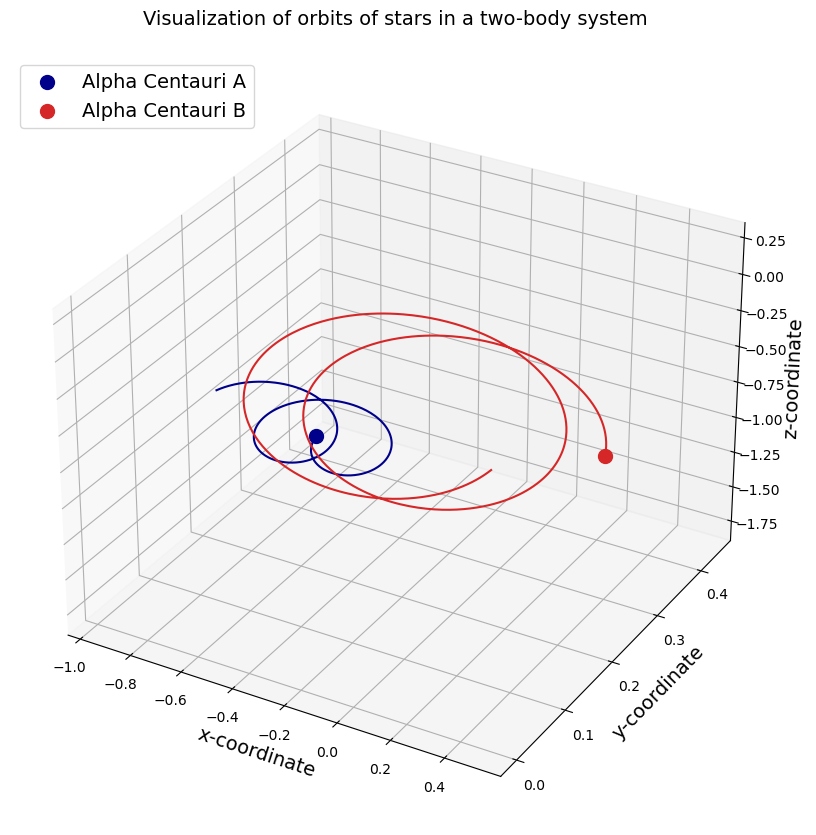

In [3]:
#A function defining the equations of motion 
def TwoBodyEquations(w,t,G,m1,m2):
    r1=w[:3]
    r2=w[3:6]
    v1=w[6:9]
    v2=w[9:12]
    r=np.linalg.norm(r2-r1) #Calculate magnitude or norm of vector
    dv1bydt=K1*m2*(r2-r1)/r**3
    dv2bydt=K1*m1*(r1-r2)/r**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    r_derivs=np.concatenate((dr1bydt,dr2bydt))
    derivs=np.concatenate((r_derivs,dv1bydt,dv2bydt))
    return derivs

#Package initial parameters
init_params=np.array([r1,r2,v1,v2]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D
time_span=np.linspace(0,8,500) #8 orbital periods and 500 points
#Run the ODE solver

two_body_sol=sci.integrate.odeint(TwoBodyEquations,init_params,time_span,args=(G,m1,m2)) #make sure to understand what is within this variable
#extract two arrays and plot it like normal
#odeint- what does it do?
#in 2D
r1_sol=two_body_sol[:,:3]
r2_sol=two_body_sol[:,3:6]

#Find location of COM
rcom_sol=(m1*r1_sol+m2*r2_sol)/(m1+m2)
#Find location of Alpha Centauri A w.r.t COM
r1com_sol=r1_sol-rcom_sol
#Find location of Alpha Centauri B w.r.t COM
r2com_sol=r2_sol-rcom_sol

#Create figure
fig=plt.figure(figsize=(10,10))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

def update(num, r1_sol, r2_sol, point1, point2):
    point1.set_data(r1_sol[num, 0], r1_sol[num, 1])
    point1.set_3d_properties(r1_sol[num, 2])
    point2.set_data(r2_sol[num, 0], r2_sol[num, 1])
    point2.set_3d_properties(r2_sol[num, 2])
    return point1, point2

# Create animation
anim = FuncAnimation(fig, update, frames=len(time_span), fargs=(r1_sol, r2_sol, point1, point2), interval=50, blit=True)

plt.show()


Add dynamical firction to differential gravitation

In [4]:
from matplotlib.animation import FuncAnimation

def init_func():
    ax.clear()
    ax.set_xlabel("x-coordinate",fontsize=14)
    ax.set_ylabel("y-coordinate",fontsize=14)
    ax.set_zlabel("z-coordinate",fontsize=14)

anim = FuncAnimation

In [5]:
def update(num, r1_sol, r2_sol, point1, point2):
    point1.set_data(r1_sol[num, 0], r1_sol[num, 1])
    point1.set_3d_properties(r1_sol[num, 2])
    point2.set_data(r2_sol[num, 0], r2_sol[num, 1])
    point2.set_3d_properties(r2_sol[num, 2])
    return point1, point2

# Create animation
ani = FuncAnimation(fig, update, frames=len(time_span), fargs=(r1_sol, r2_sol, point1, point2), interval=50, blit=False)

plt.show()

NameError: name 'point1' is not defined

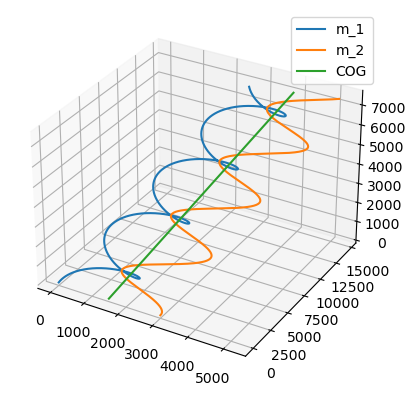

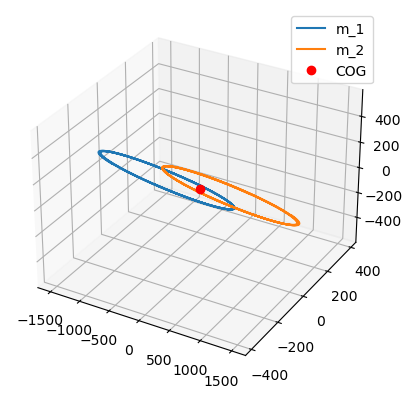

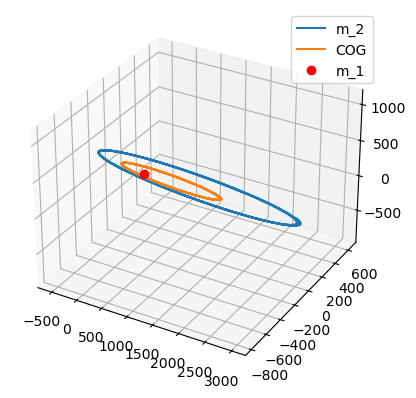

In [6]:
import numpy as np

G = 6.67430e-20  # km**3/(kg * s**2)
m_1 = m_2 = 1.0e26  # kg

R_1_0 = np.array((0, 0, 0))  # km
R_2_0 = np.array((3000, 0, 0))  # km
dotR_1_0 = np.array((10, 20, 30))  # km/s
dotR_2_0 = np.array((0, 40, 0))  # km/s

y_0 = np.hstack((R_1_0, R_2_0, dotR_1_0, dotR_2_0))

X_1 = y_0[0]
Y_1 = y_0[1]
Z_1 = y_0[2]
X_2 = y_0[3]
Y_2 = y_0[4]
Z_2 = y_0[5]

r = np.sqrt((X_2 - X_1) ** 2 + (Y_2 - Y_1) ** 2 + (Z_2 - Z_1) ** 2)

ddotX_1 = G * m_2 * (X_2 - X_1) / r**3
ddotY_1 = G * m_2 * (Y_2 - Y_1) / r**3
ddotZ_1 = G * m_2 * (Z_2 - Z_1) / r**3
ddotX_2 = -G * m_1 * (X_2 - X_1) / r**3
ddotY_2 = -G * m_1 * (Y_2 - Y_1) / r**3
ddotZ_2 = -G * m_1 * (Z_2 - Z_1) / r**3

R_1 = y_0[:3]
R_2 = y_0[3:6]

r = np.sqrt(np.sum(np.square(R_2 - R_1)))
ddot = G * (R_2 - R_1) / r**3
ddotR_1_0 = m_2 * ddot
ddotR_2_0 = -m_1 * ddot

Delta_t = 1  # s
dotR_1_1 = ddotR_1_0 * Delta_t + dotR_1_0
dotR_2_1 = ddotR_2_0 * Delta_t + dotR_2_0

R_1_1 = dotR_1_0 * Delta_t + R_1_0
R_2_1 = dotR_2_0 * Delta_t + R_2_0

import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def absolute_motion(t, y):
    """Calculate the motion of a two-body system in an inertial reference frame.

    The state vector ``y`` should be in the order:

    1. Coordinates of $m_1$
    2. Coordinates of $m_2$
    3. Velocity components of $m_1$
    4. Velocity components of $m_2$
    """
    # Get the six coordinates for m_1 and m_2 from the state vector
    R_1 = y[:3]
    R_2 = y[3:6]

    # Fill the derivative vector with zeros
    ydot = np.zeros_like(y)

    # Set the first 6 elements of the derivative equal to the last
    # 6 elements of the state vector, which are the velocities
    ydot[:6] = y[6:]

    # Calculate the acceleration terms and fill them in to the rest
    # of the derivative array
    r = np.sqrt(np.sum(np.square(R_2 - R_1)))
    ddot = G * (R_2 - R_1) / r**3
    ddotR_1 = m_2 * ddot
    ddotR_2 = -m_1 * ddot

    ydot[6:9] = ddotR_1
    ydot[9:] = ddotR_2
    return ydot


t_0 = 0  # seconds
t_f = 480  # seconds
t_points = np.linspace(t_0, t_f, 1000)

sol = solve_ivp(absolute_motion, [t_0, t_f], y_0, t_eval=t_points)

y = sol.y.T
R_1 = y[:, :3]  # km
R_2 = y[:, 3:6]  # km
V_1 = y[:, 6:9]  # km/s
V_2 = y[:, 9:]  # km/s
barycenter = (m_1 * R_1 + m_2 * R_2) / (m_1 + m_2)  # km

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot(R_1[:, 0], R_1[:, 1], R_1[:, 2], label="m_1")
ax.plot(R_2[:, 0], R_2[:, 1], R_2[:, 2], label="m_2")
ax.plot(barycenter[:, 0], barycenter[:, 1], barycenter[:, 2], label="COG")
ax.legend()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
R1_rel_COG = R_1 - barycenter
R2_rel_COG = R_2 - barycenter
ax.plot(R1_rel_COG[:, 0], R1_rel_COG[:, 1], R1_rel_COG[:, 2], label="m_1")
ax.plot(R2_rel_COG[:, 0], R2_rel_COG[:, 1], R2_rel_COG[:, 2], label="m_2")
ax.plot(0, 0, 0, "ro", label="COG")
ax.legend()


fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
R2_rel_R1 = R_2 - R_1
COG_rel_R1 = barycenter - R_1
ax.plot(R2_rel_R1[:, 0], R2_rel_R1[:, 1], R2_rel_R1[:, 2], label="m_2")
ax.plot(COG_rel_R1[:, 0], COG_rel_R1[:, 1], COG_rel_R1[:, 2], label="COG")
ax.plot(0, 0, 0, "ro", label="m_1")
ax.legend()